# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
df = pd.read_csv('../Categorical.csv')
df.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


Remove the duplicate index column from the dataset. 

In [3]:
df[df.duplicated(keep = 'first')==False]

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [4]:
grp_cont = df.groupby('continent').nunique()
grp_cont['continent']

continent
Africa                     1
Antarctica                 1
Asia                       1
Europe                     1
North America              1
Oceania                    1
Seven seas (open ocean)    1
South America              1
Name: continent, dtype: int64

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [5]:
def mapContinent(col):
    c = 0
    dict_cont = {}
    for i in grp_cont['continent'].index:
        dict_cont[i]=c
        c+=1
    return(dict_cont)

In [6]:
df_data = df.copy()
df_data['continent'] = df_data['continent'].map(mapContinent(df_data['continent']))
df_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,4
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,4
4,Albania,20.049834,41.142450,3


## Select the features

In [11]:
x = df_data.iloc[:,3:4]
x

,continent
0,4
1,2
2,0
3,4
4,3
...,...
236,5
237,2
238,0
239,0


## Clustering

Use 4 clusters initially.

In [12]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [13]:
idfied_clustered = kmeans.fit_predict(x)
idfied_clustered

array([1, 0, 2, 1, 0, 0, 0, 0, 3, 0, 1, 2, 1, 3, 1, 1, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 3, 3, 1, 0, 0, 2, 2, 0, 3, 0, 2, 2,
       2, 2, 1, 3, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 3, 2, 2,
       0, 0, 2, 0, 1, 3, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1,
       1, 3, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 2, 0, 0, 2, 3, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 3, 2, 0,
       2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 3, 0, 1, 1, 0, 1,
       0, 0, 3, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 3, 3, 1, 2, 1, 0, 2,
       2, 1, 0, 2, 3, 0, 0, 0, 2, 1, 3, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 2, 2, 0, 3, 1, 0, 0, 1, 3, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2])

In [15]:
df_clustered = df_data.copy()
df_clustered['Cluster'] = idfied_clustered
df_clustered.head()

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,4,1
1,Afghanistan,66.004734,33.835231,2,0
2,Angola,17.537368,-12.293361,0,2
3,Anguilla,-63.064989,18.223959,4,1
4,Albania,20.049834,41.142450,3,0


## Plot the data

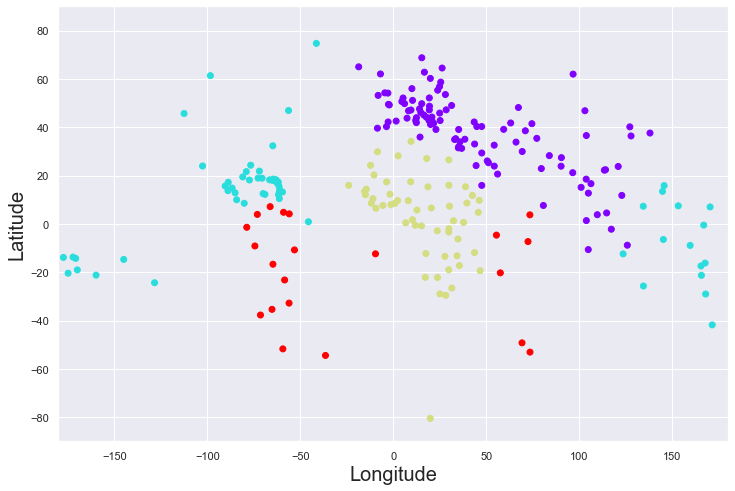

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(df_clustered['Longitude'], df_clustered['Latitude'],c=df_clustered['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.xlabel('Longitude', fontsize=20)
plt.ylim(-90,90)
plt.ylabel('Latitude', fontsize=20)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.

In [17]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
idfied_clustered = kmeans.fit_predict(x)
df_clustered['Cluster'] = idfied_clustered
df_clustered.head()

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,4,1
1,Afghanistan,66.004734,33.835231,2,2
2,Angola,17.537368,-12.293361,0,0
3,Anguilla,-63.064989,18.223959,4,1
4,Albania,20.049834,41.142450,3,2


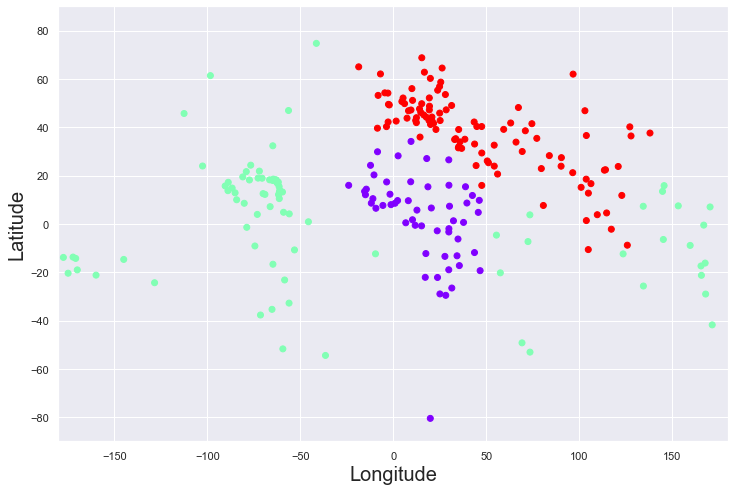

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(df_clustered['Longitude'], df_clustered['Latitude'],c=df_clustered['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.xlabel('Longitude', fontsize=20)
plt.ylim(-90,90)
plt.ylabel('Latitude', fontsize=20)
plt.show()

In [20]:
kmeans = KMeans(7)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
idfied_clustered = kmeans.fit_predict(x)
df_clustered['Cluster'] = idfied_clustered
df_clustered.head()

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,4,3
1,Afghanistan,66.004734,33.835231,2,0
2,Angola,17.537368,-12.293361,0,2
3,Anguilla,-63.064989,18.223959,4,3
4,Albania,20.049834,41.142450,3,4


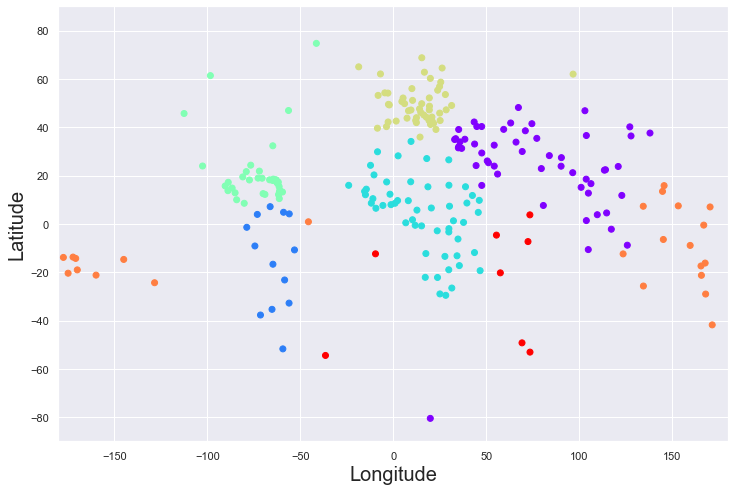

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(df_clustered['Longitude'], df_clustered['Latitude'],c=df_clustered['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.xlabel('Longitude', fontsize=20)
plt.ylim(-90,90)
plt.ylabel('Latitude', fontsize=20)
plt.show()

In [23]:
kmeans = KMeans(8)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
idfied_clustered = kmeans.fit_predict(x)
df_clustered['Cluster'] = idfied_clustered
df_clustered.head()

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,4,1
1,Afghanistan,66.004734,33.835231,2,2
2,Angola,17.537368,-12.293361,0,0
3,Anguilla,-63.064989,18.223959,4,1
4,Albania,20.049834,41.142450,3,4


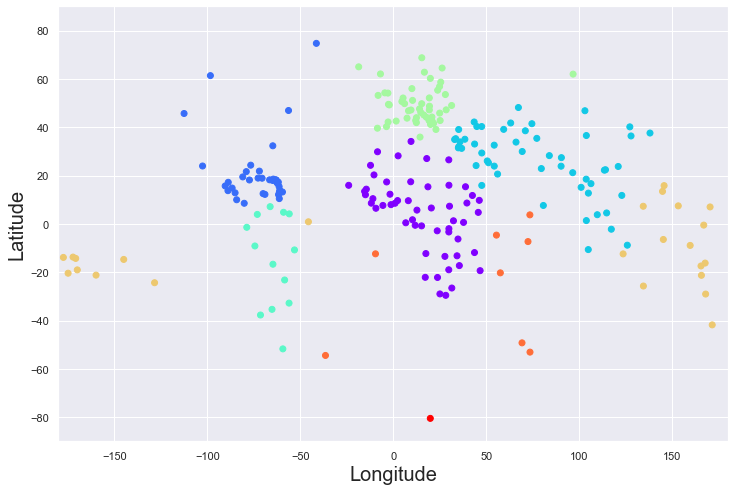

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(df_clustered['Longitude'], df_clustered['Latitude'],c=df_clustered['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.xlabel('Longitude', fontsize=20)
plt.ylim(-90,90)
plt.ylabel('Latitude', fontsize=20)
plt.show()